In [1]:
import pandas as pd
from collections import defaultdict
from sklearn import metrics
import numpy as np
import sys
import time

start_time = time.time()

inbinfile='/Users/irffanalahi/Research/Research_update/SoftRD/largerEXP/BL22genepromdelta.7/insilico/training/bestrefperfforTEST/ROC_plots/BL22_binned/troubleshooting/BL22_genepromSM_0.7.txt_TRAININGbestref.txt_result_dupindex_binnedstats.pkl'

outfile=inbinfile


consideringALLheyper=True


inbindf=pd.read_pickle(inbinfile)
###BL22###
scorecolumns=['NaiveCD4-others','NaiveCD8-others','nB-others','NK-others','PC-others','Mono-others','M0-others','M1-others','M2-others','iDC-others','mDC-others','PMN-others','cm8-others','em8-others','Eo-others','Tregs-others','em4-others','ed8-others','Mg-others','cm4-others','Er-others','mB-others']


#scorecolumns=['CD4-others','CD8-others','nB-others','NK-others','Mn-others','mNeu-others','m8-others','DC-others','Eo-others','Tr-others','m4-others','Mg-others','Er-others','mB-others']

inbindf=inbindf.reset_index()
inbindf.head()

,index,NaiveCD4-others,NaiveCD8-others,nB-others,NK-others,PC-others,Mono-others,M0-others,M1-others,M2-others,...,LENhypoCpG,LENhyperCpG,total_cpg,LENhypoCpG_BY_total_cpg,maxscoredCT_beforeCpGweight,maxscore_beforeCpGweight,maxscoredCT,maxscore,deltabasedfragassignment,filename
0,Eo.HWI-ST537:223:C4DVTACXX:7:1211:7435:87447,-0.181992,-0.146024,-0.188627,-0.131008,-0.087008,-0.121579,0.035913,0.019849,0.431214,...,1.0,0.0,1.0,1.0,iDC-others,0.769421,iDC-others,0.769421,iDC-others,BL22test_NR_3215798_insilmix6_sorted_binnedsta...
1,Eo.HWI-ST537:224:C4E15ACXX:4:2108:11851:51609,-0.078167,-0.018802,-0.051278,-0.062452,-0.053722,-0.026135,-0.065595,-0.078167,-0.053373,...,1.0,0.0,1.0,1.0,PMN-others,0.969452,PMN-others,0.969452,PMN-others,BL22test_NR_3215798_insilmix6_sorted_binnedsta...
2,Eo.HWI-ST537:224:C4E15ACXX:5:2205:15200:28811,-0.238056,-0.233865,-0.196849,-0.222341,-0.203135,0.735881,0.502960,0.526008,0.567563,...,1.0,0.0,1.0,1.0,Mono-others,0.735881,Mono-others,0.735881,Mono-others,BL22test_NR_3215798_insilmix6_sorted_binnedsta...
3,Eo.HWI-ST699:234:C48WNACXX:4:2307:17364:71298,-0.095000,-0.117000,0.924333,-0.085222,-0.103381,-0.074397,-0.102333,-0.084175,-0.066365,...,1.0,0.0,1.0,1.0,nB-others,0.924333,nB-others,0.924333,nB-others,BL22test_NR_3215798_insilmix6_sorted_binnedsta...
4,Eo.HWI-ST731:122:C7CNDACXX:4:2202:4871:39568,-0.048310,0.812135,-0.089167,0.288325,0.107437,-0.092659,-0.130722,-0.130722,-0.107675,...,1.0,0.0,1.0,1.0,NaiveCD8-others,0.812135,NaiveCD8-others,0.812135,NaiveCD8-others,BL22test_NR_3215798_insilmix6_sorted_binnedsta...


In [2]:
if consideringALLheyper==True:
    allassigned=inbindf.copy()


elif consideringALLheyper==False:
    allassigned=inbindf[inbindf['deltabasedfragassignment']!='NotAssigned'].copy()
    
else:
    print("wrong input")
    sys.exit(1)
#
allassigned.head()

,index,NaiveCD4-others,NaiveCD8-others,nB-others,NK-others,PC-others,Mono-others,M0-others,M1-others,M2-others,...,LENhypoCpG,LENhyperCpG,total_cpg,LENhypoCpG_BY_total_cpg,maxscoredCT_beforeCpGweight,maxscore_beforeCpGweight,maxscoredCT,maxscore,deltabasedfragassignment,filename
0,Eo.HWI-ST537:223:C4DVTACXX:7:1211:7435:87447,-0.181992,-0.146024,-0.188627,-0.131008,-0.087008,-0.121579,0.035913,0.019849,0.431214,...,1.0,0.0,1.0,1.0,iDC-others,0.769421,iDC-others,0.769421,iDC-others,BL22test_NR_3215798_insilmix6_sorted_binnedsta...
1,Eo.HWI-ST537:224:C4E15ACXX:4:2108:11851:51609,-0.078167,-0.018802,-0.051278,-0.062452,-0.053722,-0.026135,-0.065595,-0.078167,-0.053373,...,1.0,0.0,1.0,1.0,PMN-others,0.969452,PMN-others,0.969452,PMN-others,BL22test_NR_3215798_insilmix6_sorted_binnedsta...
2,Eo.HWI-ST537:224:C4E15ACXX:5:2205:15200:28811,-0.238056,-0.233865,-0.196849,-0.222341,-0.203135,0.735881,0.502960,0.526008,0.567563,...,1.0,0.0,1.0,1.0,Mono-others,0.735881,Mono-others,0.735881,Mono-others,BL22test_NR_3215798_insilmix6_sorted_binnedsta...
3,Eo.HWI-ST699:234:C48WNACXX:4:2307:17364:71298,-0.095000,-0.117000,0.924333,-0.085222,-0.103381,-0.074397,-0.102333,-0.084175,-0.066365,...,1.0,0.0,1.0,1.0,nB-others,0.924333,nB-others,0.924333,nB-others,BL22test_NR_3215798_insilmix6_sorted_binnedsta...
4,Eo.HWI-ST731:122:C7CNDACXX:4:2202:4871:39568,-0.048310,0.812135,-0.089167,0.288325,0.107437,-0.092659,-0.130722,-0.130722,-0.107675,...,1.0,0.0,1.0,1.0,NaiveCD8-others,0.812135,NaiveCD8-others,0.812135,NaiveCD8-others,BL22test_NR_3215798_insilmix6_sorted_binnedsta...


In [3]:
allassigned.loc[inbindf['deltabasedfragassignment']=='NotAssigned','deltabasedfragassignment']=allassigned.loc[inbindf['deltabasedfragassignment']=='NotAssigned','maxscoredCT_beforeCpGweight']

In [4]:
allassigned['secondmaxScore']='Notassigned'
allassigned['secondmaxScoreCT']='Notassigned'
allassigned.head()

,index,NaiveCD4-others,NaiveCD8-others,nB-others,NK-others,PC-others,Mono-others,M0-others,M1-others,M2-others,...,total_cpg,LENhypoCpG_BY_total_cpg,maxscoredCT_beforeCpGweight,maxscore_beforeCpGweight,maxscoredCT,maxscore,deltabasedfragassignment,filename,secondmaxScore,secondmaxScoreCT
0,Eo.HWI-ST537:223:C4DVTACXX:7:1211:7435:87447,-0.181992,-0.146024,-0.188627,-0.131008,-0.087008,-0.121579,0.035913,0.019849,0.431214,...,1.0,1.0,iDC-others,0.769421,iDC-others,0.769421,iDC-others,BL22test_NR_3215798_insilmix6_sorted_binnedsta...,Notassigned,Notassigned
1,Eo.HWI-ST537:224:C4E15ACXX:4:2108:11851:51609,-0.078167,-0.018802,-0.051278,-0.062452,-0.053722,-0.026135,-0.065595,-0.078167,-0.053373,...,1.0,1.0,PMN-others,0.969452,PMN-others,0.969452,PMN-others,BL22test_NR_3215798_insilmix6_sorted_binnedsta...,Notassigned,Notassigned
2,Eo.HWI-ST537:224:C4E15ACXX:5:2205:15200:28811,-0.238056,-0.233865,-0.196849,-0.222341,-0.203135,0.735881,0.502960,0.526008,0.567563,...,1.0,1.0,Mono-others,0.735881,Mono-others,0.735881,Mono-others,BL22test_NR_3215798_insilmix6_sorted_binnedsta...,Notassigned,Notassigned
3,Eo.HWI-ST699:234:C48WNACXX:4:2307:17364:71298,-0.095000,-0.117000,0.924333,-0.085222,-0.103381,-0.074397,-0.102333,-0.084175,-0.066365,...,1.0,1.0,nB-others,0.924333,nB-others,0.924333,nB-others,BL22test_NR_3215798_insilmix6_sorted_binnedsta...,Notassigned,Notassigned
4,Eo.HWI-ST731:122:C7CNDACXX:4:2202:4871:39568,-0.048310,0.812135,-0.089167,0.288325,0.107437,-0.092659,-0.130722,-0.130722,-0.107675,...,1.0,1.0,NaiveCD8-others,0.812135,NaiveCD8-others,0.812135,NaiveCD8-others,BL22test_NR_3215798_insilmix6_sorted_binnedsta...,Notassigned,Notassigned


In [5]:
grouped=allassigned.groupby('maxscoredCT')

for name, group in grouped:
    
    
    tempscorecolumns=scorecolumns.copy()
    
    tempscorecolumns.remove(name)
    
    allassigned.loc[group.index,'secondmaxScore']=group[tempscorecolumns].max(axis=1)
    allassigned.loc[group.index,'secondmaxScoreCT']=(group[tempscorecolumns]).idxmax(axis=1)
   

In [6]:
allassigned['adjustedScore_minus']=allassigned['maxscore']-allassigned['secondmaxScore']
allassigned['adjustedScore_minus_avg']=(allassigned['maxscore']+(allassigned['maxscore']-allassigned['secondmaxScore']))/2
allassigned.head()

,index,NaiveCD4-others,NaiveCD8-others,nB-others,NK-others,PC-others,Mono-others,M0-others,M1-others,M2-others,...,maxscoredCT_beforeCpGweight,maxscore_beforeCpGweight,maxscoredCT,maxscore,deltabasedfragassignment,filename,secondmaxScore,secondmaxScoreCT,adjustedScore_minus,adjustedScore_minus_avg
0,Eo.HWI-ST537:223:C4DVTACXX:7:1211:7435:87447,-0.181992,-0.146024,-0.188627,-0.131008,-0.087008,-0.121579,0.035913,0.019849,0.431214,...,iDC-others,0.769421,iDC-others,0.769421,iDC-others,BL22test_NR_3215798_insilmix6_sorted_binnedsta...,0.724373,mDC-others,0.0450476,0.407234
1,Eo.HWI-ST537:224:C4E15ACXX:4:2108:11851:51609,-0.078167,-0.018802,-0.051278,-0.062452,-0.053722,-0.026135,-0.065595,-0.078167,-0.053373,...,PMN-others,0.969452,PMN-others,0.969452,PMN-others,BL22test_NR_3215798_insilmix6_sorted_binnedsta...,0.0360238,Eo-others,0.933429,0.95144
2,Eo.HWI-ST537:224:C4E15ACXX:5:2205:15200:28811,-0.238056,-0.233865,-0.196849,-0.222341,-0.203135,0.735881,0.502960,0.526008,0.567563,...,Mono-others,0.735881,Mono-others,0.735881,Mono-others,BL22test_NR_3215798_insilmix6_sorted_binnedsta...,0.567563,M2-others,0.168317,0.452099
3,Eo.HWI-ST699:234:C48WNACXX:4:2307:17364:71298,-0.095000,-0.117000,0.924333,-0.085222,-0.103381,-0.074397,-0.102333,-0.084175,-0.066365,...,nB-others,0.924333,nB-others,0.924333,nB-others,BL22test_NR_3215798_insilmix6_sorted_binnedsta...,0.842619,mB-others,0.0817143,0.503024
4,Eo.HWI-ST731:122:C7CNDACXX:4:2202:4871:39568,-0.048310,0.812135,-0.089167,0.288325,0.107437,-0.092659,-0.130722,-0.130722,-0.107675,...,NaiveCD8-others,0.812135,NaiveCD8-others,0.812135,NaiveCD8-others,BL22test_NR_3215798_insilmix6_sorted_binnedsta...,0.288325,NK-others,0.52381,0.667972


In [7]:
allassigned.columns

Index(['index', 'NaiveCD4-others', 'NaiveCD8-others', 'nB-others', 'NK-others',
       'PC-others', 'Mono-others', 'M0-others', 'M1-others', 'M2-others',
       'iDC-others', 'mDC-others', 'PMN-others', 'cm8-others', 'em8-others',
       'Eo-others', 'Tregs-others', 'em4-others', 'ed8-others', 'Mg-others',
       'cm4-others', 'Er-others', 'mB-others', 'LENhypoCpG', 'LENhyperCpG',
       'total_cpg', 'LENhypoCpG_BY_total_cpg', 'maxscoredCT_beforeCpGweight',
       'maxscore_beforeCpGweight', 'maxscoredCT', 'maxscore',
       'deltabasedfragassignment', 'filename', 'secondmaxScore',
       'secondmaxScoreCT', 'adjustedScore_minus', 'adjustedScore_minus_avg'],
      dtype='object')

In [8]:
adjustedScore_minus0val=list(set(allassigned[allassigned['LENhypoCpG_BY_total_cpg']==0]['adjustedScore_minus'].tolist()))
if len(adjustedScore_minus0val)==0:
    pass
elif len(adjustedScore_minus0val)!=1 or adjustedScore_minus0val[0]!=0:
    print(adjustedScore_minus0val)
    sys.exit(1)
    

In [9]:



adjustedScore_minus_avg0val=list(set(allassigned[allassigned['LENhypoCpG_BY_total_cpg']==0]['adjustedScore_minus_avg'].tolist()))


if len(adjustedScore_minus_avg0val)==0:
    pass

elif len(adjustedScore_minus_avg0val)!=1 or adjustedScore_minus_avg0val[0]!=0:
    print(adjustedScore_minus_avg0val)
    sys.exit(1)
    

In [10]:
allassigned['LENhypoCpG_0.8']=0
allassigned.loc[allassigned['LENhypoCpG_BY_total_cpg']>=0.8,'LENhypoCpG_0.8']=allassigned.loc[allassigned['LENhypoCpG_BY_total_cpg']>=0.8,'LENhypoCpG']

In [11]:
allassigned['LENhypoCpG_0.5']=0
allassigned.loc[allassigned['LENhypoCpG_BY_total_cpg']>=0.5,'LENhypoCpG_0.5']=allassigned.loc[allassigned['LENhypoCpG_BY_total_cpg']>=0.5,'LENhypoCpG']

In [12]:
def calculate_metrics_correct(currentmethods):
    

    for acelltype in scorecolumns:
        
        
        
        celltype=acelltype.replace('-others','')
        
        

        
        for method in currentmethods:
       

            y=allassigned[allassigned['index'].str.contains(celltype)].copy()
            
            
          

            y[method+"_"+celltype]=-1

            y.loc[y['deltabasedfragassignment']==acelltype,method+"_"+celltype]=y.loc[y['deltabasedfragassignment']==acelltype,method]




            pred=list((y[method+"_"+celltype]).to_numpy())


            ytrue=[1]*y.shape[0]





            noty=allassigned[~allassigned['index'].str.contains(celltype)].copy()
            noty[method+"_"+celltype]=0

            noty.loc[noty['deltabasedfragassignment']==acelltype,method+"_"+celltype]=noty.loc[noty['deltabasedfragassignment']==acelltype,method]

            pred2=list((noty[method+"_"+celltype]).to_numpy())

            yfalse=[0]*noty.shape[0]

            ally=ytrue+yfalse
            allpred=pred+pred2



            '''
            ctinfodf=pd.DataFrame(data={'gt':ally,'score':allpred})
            ctinfodf.to_csv(outfile+"_"+celltype+".txt",sep='\t',index=False)

            sys.exit(1)
            '''







            fpr, tpr, thresholds=metrics.roc_curve(ally,allpred,pos_label=1)


            tempAUC=metrics.auc(fpr, tpr)

            celltypeAUC[celltype]=celltypeAUC[celltype]+[tempAUC]

            optimal_idx = np.argmax(tpr - fpr)
            optimal_threshold = thresholds[optimal_idx]
            celltypeoptcutpoint[celltype]=celltypeoptcutpoint[celltype]+[optimal_threshold]


        





In [13]:



celltypeAUC=defaultdict(list)
celltypeoptcutpoint=defaultdict(list)


allassignedgrouped=allassigned.groupby('deltabasedfragassignment')


#methods=['maxscore','adjustedScore_minus','adjustedScore_minus_avg','LENhypoCpG','LENhypoCpG_0.5','LENhypoCpG_0.8']

methods=['adjustedScore_minus_avg']

#calculate_metrics(allassignedgrouped,methods)

calculate_metrics_correct(methods)




In [14]:
celltypeAUCdf=pd.DataFrame.from_dict(celltypeAUC, orient='index',columns=methods)
celltypeAUCdf.index.name = 'Celltype'
celltypeAUCdf.head()

,adjustedScore_minus_avg
Celltype,
NaiveCD4,0.119590
NaiveCD8,0.018142
nB,0.035563
NK,0.124739
PC,0.013564


In [15]:
celltypeoptcutpointdf=pd.DataFrame.from_dict(celltypeoptcutpoint, orient='index',columns=methods)
celltypeoptcutpointdf.index.name = 'Celltype'
celltypeoptcutpointdf.head()

,adjustedScore_minus_avg
Celltype,
NaiveCD4,0.422841
NaiveCD8,0.465635
nB,0.475575
NK,0.433409
PC,0.935599


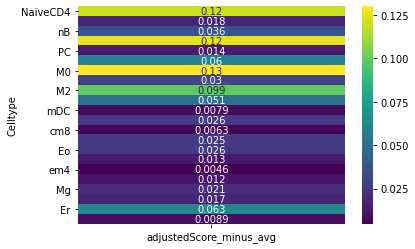

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
ax = sns.heatmap(celltypeAUCdf, annot=True,cmap='viridis')
plt.savefig(outfile+"_Allheyper"+str(consideringALLheyper)+"_AUC.pdf",bbox_inches = "tight")

In [17]:
celltypeAUCdf.to_csv(outfile+"_Allhyper"+str(consideringALLheyper)+"_AUC.txt",sep="\t")
celltypeoptcutpointdf.to_csv(outfile+"_Allhyper"+str(consideringALLheyper)+"_Cutpoint.txt",sep="\t")

In [18]:
end_time = time.time()

time_elapsed = (end_time - start_time)

print(time_elapsed)


2.85931396484375
